In [1]:
import import_ipynb

In [2]:
%run iteration_0_imports.py

In [3]:
%run iteration_0_parameters.py

In [4]:
import iteration_0_utils as utils

importing Jupyter notebook from iteration_0_utils.ipynb


In [5]:
%whos

Variable                          Type        Data/Info
-------------------------------------------------------
HEALTHY                           str         H
IMG_IN_COLOR                      int         1
IMG_SIZE                          int         64
Image                             module      <module 'PIL.Image' from <...>packages\\PIL\\Image.py'>
NBR_SAMPLE                        int         20000
PATH_DATA                         str         ../data
PATH_DATA_EDA                     str         ../data/eda
PATH_DATA_LIST                    str         ../data/list
PATH_DATA_SAMPLE                  str         ../data/sample
PATH_MODEL                        str         ../model
PATH_ROOT                         str         ..
PATH_SOURCE_IMG                   str         ../cell_images
RandomForestClassifier            ABCMeta     <class 'sklearn.ensemble.<...>.RandomForestClassifier'>
SICK                              str         S
classification_report             function

# make X, y

In [6]:
DATE_TIME = "2021-11-18_20-39-00"

In [7]:
# get list 
list_path_sample_img = []
list_path_sample_img.extend(glob.glob(PATH_DATA_SAMPLE+"/"+DATE_TIME+ "/"+ "*.pklz"))

In [8]:
# split train, validation, test set
list_path_sample_img_train, list_path_sample_img_test  = train_test_split(list_path_sample_img, test_size=0.2)
list_path_sample_img_train, list_path_sample_img_valid = train_test_split(list_path_sample_img_train, test_size=0.2)

In [9]:
def make_Xy(list_path_sample_img: list) -> (np.array, np.array):
    X = np.ndarray( (len(list_path_sample_img), IMG_SIZE, IMG_SIZE, 3) ,dtype = "float16")
    y = np.array([""] * len(list_path_sample_img))
    for i, path in tqdm(enumerate(list_path_sample_img)):
        
        X[i] = utils.pickle_read(path).astype("float16")
    
        _, file_name, _ = utils.split_file_info(path)
        y[i] = file_name[0]
    
    return X, y
    

In [10]:
X_train, y_train  = make_Xy(list_path_sample_img_train)

12800it [02:11, 97.00it/s] 


In [11]:
X_valid, y_valid  = make_Xy(list_path_sample_img_valid)

3200it [00:28, 110.42it/s]


In [12]:
X_test, y_test  = make_Xy(list_path_sample_img_test)

4000it [00:35, 112.87it/s]


# model_cnn

* Ref: https://towardsdatascience.com/detecting-malaria-with-deep-learning-9e45c1e34b60
* https://towardsdatascience.com/understanding-and-calculating-the-number-of-parameters-in-convolution-neural-networks-cnns-fc88790d530d

In [13]:
BATCH_SIZE = 500
NUM_CLASSES = 2
EPOCHS = 25
INPUT_SHAPE = (IMG_SIZE, IMG_SIZE, 3)

In [14]:
# Encoder y
from sklearn.preprocessing import LabelEncoder

In [15]:
le = LabelEncoder()

In [16]:
y_train_enc = le.fit_transform(y_train)

In [17]:
y_valid_enc = le.transform(y_valid)
y_test_enc  = le.transform(y_test)

In [18]:
le.classes_

array(['H', 'S'], dtype='<U1')

In [19]:
#!pip uninstall tensorflow

Créer un fichier .reg avec les instructions suivantes :

===

Windows Registry Editor Version 5.00

[HKEY_LOCAL_MACHINE\SYSTEM\CurrentControlSet\Control\FileSystem]
"LongPathsEnabled"=dword:00000001

---

Exécuter le .reg

In [20]:
#!pip install tensorflow

In [21]:
import tensorflow as tf

In [22]:
from keras.models import Sequential

In [23]:
#assert False

In [24]:
def plot_history(history):
    plt.figure(figsize=(16,9))
    # plot loss
    plt.subplot(211)
    plt.grid()
    plt.title('binary_crossentropy')
    plt.plot(history.history['loss'], "o-", color='blue', label='train')
    plt.plot(history.history['val_loss'], "o-", color='orange', label='validation')
    plt.legend()    
    # plot accuracy
    plt.subplot(212)
    plt.grid()
    plt.title('Classification Accuracy')
    plt.plot(history.history['accuracy'], "o-",color='blue', label='train')
    plt.plot(history.history['val_accuracy'], "o-",color='orange', label='validation')
    plt.legend()
    plt.show()

In [25]:
model_cnn_5 = Sequential()
model_cnn_5.add(tf.keras.layers.Input(name = "input", shape=INPUT_SHAPE))
model_cnn_5.add(tf.keras.layers.Conv2D(name = "conv2D",
                                     filters=32,
                                     kernel_size=(3,3),
                                     activation="LeakyReLU",
                                     padding="same",
                                     kernel_initializer="he_uniform"
                                    ))
model_cnn_5.add(tf.keras.layers.MaxPooling2D(name="pooling", pool_size=(2,2)))

model_cnn_5.add(tf.keras.layers.Conv2D(name = "conv2D_2",
                                     filters=64,
                                     kernel_size=(3,3),
                                     activation="LeakyReLU",
                                     padding="same",
                                     kernel_initializer="he_uniform"
                                    ))
model_cnn_5.add(tf.keras.layers.MaxPooling2D(name="pooling_2", pool_size=(2,2)))

model_cnn_5.add(tf.keras.layers.Conv2D(name = "conv2D_3",
                                     filters=128,
                                     kernel_size=(3,3),
                                     activation="LeakyReLU",
                                     padding="same",
                                     kernel_initializer="he_uniform"
                                    ))
model_cnn_5.add(tf.keras.layers.MaxPooling2D(name="pooling_3", pool_size=(2,2)))

model_cnn_5.add(tf.keras.layers.Flatten(name="flatten"))
model_cnn_5.add(tf.keras.layers.Dense(name="dense_hidden", units = 1024, activation="LeakyReLU",
                                    kernel_initializer="he_uniform" ))
model_cnn_5.add(tf.keras.layers.Dense(name="dense_hidden_2", units = 128, activation="LeakyReLU",
                                    kernel_initializer="he_uniform" ))
model_cnn_5.add(tf.keras.layers.Dense(name="ouput", units = 1, activation="sigmoid"))


In [26]:
# compiler modele
model_cnn_5.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3),\
                    loss ="binary_crossentropy", metrics=["accuracy"])

In [27]:
model_cnn_5.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2D (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 pooling (MaxPooling2D)      (None, 32, 32, 32)        0         
                                                                 
 conv2D_2 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 pooling_2 (MaxPooling2D)    (None, 16, 16, 64)        0         
                                                                 
 conv2D_3 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 pooling_3 (MaxPooling2D)    (None, 8, 8, 128)         0         
                                                                 
 flatten (Flatten)           (None, 8192)              0

In [28]:
X_train.shape

(12800, 64, 64, 3)

In [29]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [30]:
aug = ImageDataGenerator(rotation_range=359, \
                         zoom_range=0.15, \
                         width_shift_range=0.2, height_shift_range=0.2, \
                         shear_range=0.15, \
                         horizontal_flip=True, \
                         vertical_flip=True, \
                         fill_mode="nearest")

In [31]:
len(X_train) // BATCH_SIZE

25

In [32]:
history_5 = model_cnn_5.fit( \
                            aug.flow(X_train, y_train_enc, batch_size=BATCH_SIZE, subset=None), \
                            validation_data = (X_valid, y_valid_enc), \
                            steps_per_epoch = len(X_train) // BATCH_SIZE, \
                            epochs = EPOCHS
                        )

Epoch 1/25
25/25 [==============================] - 44s 2s/step - loss: 3.3751 - accuracy: 0.5032 - val_loss: 0.6781 - val_accuracy: 0.5806
Epoch 2/25
25/25 [==============================] - 40s 2s/step - loss: 0.6687 - accuracy: 0.5916 - val_loss: 0.6439 - val_accuracy: 0.6209
Epoch 3/25
25/25 [==============================] - 42s 2s/step - loss: 0.6461 - accuracy: 0.6326 - val_loss: 0.6742 - val_accuracy: 0.5722
Epoch 4/25
25/25 [==============================] - 41s 2s/step - loss: 0.6460 - accuracy: 0.6269 - val_loss: 0.6602 - val_accuracy: 0.6097
Epoch 5/25
25/25 [==============================] - 42s 2s/step - loss: 0.6522 - accuracy: 0.6240 - val_loss: 0.6148 - val_accuracy: 0.6600
Epoch 6/25
25/25 [==============================] - 42s 2s/step - loss: 0.6374 - accuracy: 0.6368 - val_loss: 0.6774 - val_accuracy: 0.5672
Epoch 7/25
25/25 [==============================] - 41s 2s/step - loss: 0.6188 - accuracy: 0.6629 - val_loss: 0.6361 - val_accuracy: 0.6488
Epoch 8/25
25/25 [==

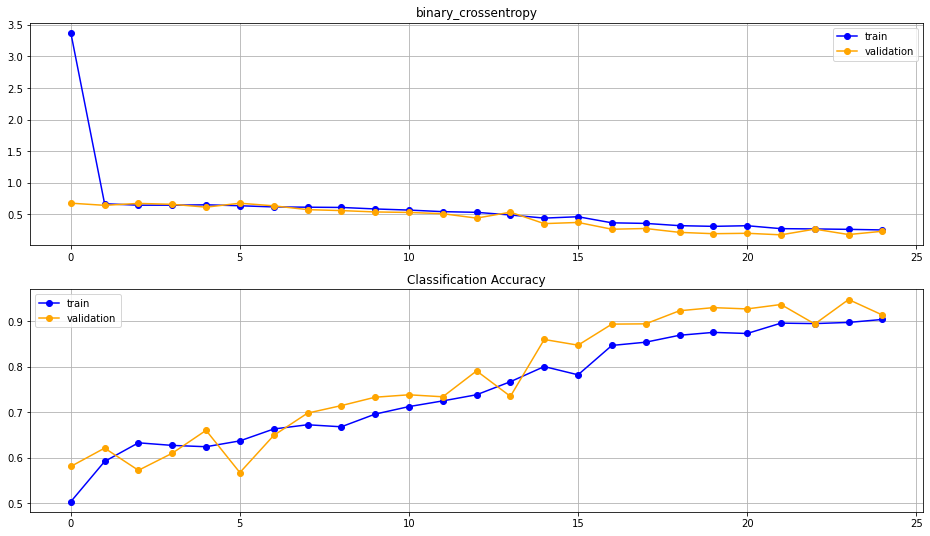

In [33]:
plot_history(history_5)

In [34]:
#Augmenter Batch Size = int(len(X_Tain) * %) + 1
#Reduire le learning rate

In [35]:
def get_classes(y_pred_proba: np.array, le:LabelEncoder) -> np.array:
    y_pred_class_num = np.rint(y_pred_proba).astype(int)
    y_pred_class_text = le.inverse_transform(y_pred_class_num.ravel())
    return y_pred_class_text

In [36]:
def get_metrics(y_test: np.array, y_pred: np.array)->(pd.DataFrame, pd.DataFrame):
    # create dataframe metrics
    df_metrics = pd.DataFrame(precision_recall_fscore_support(y_test, y_pred), columns = ["H", "S"], 
             index=["Precion", "Recall", "F1", "Support"])
    # add average column    
    df_metrics["average_macro"] = precision_recall_fscore_support(y_test, y_pred, average = "macro")
    df_metrics = df_metrics.replace(np.nan, -999)
    sr_metrics = df_metrics.stack(dropna=False)

    df_confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred), columns = ["cm_H", "cm_S"], index = ["cm_H", "cm_S"])
    sr_confusion_matrix = df_confusion_matrix.stack()
    sr_metrics = pd.concat([sr_metrics, sr_confusion_matrix])
    
    return df_metrics, df_confusion_matrix

In [37]:
y_pred_proba = model_cnn_5.predict(X_test)

In [38]:
y_pred = get_classes(y_pred_proba, le)

In [39]:
df_metrics, df_confusion_matrix = get_metrics(y_test, y_pred)

In [40]:
df_metrics

,H,S,average_macro
Precion,0.891738,0.936642,0.914190
Recall,0.939940,0.886114,0.913027
F1,0.915205,0.910678,0.912941
Support,1998.000000,2002.000000,-999.000000


In [41]:
df_confusion_matrix

,cm_H,cm_S
cm_H,1878,120
cm_S,228,1774


In [42]:
#model_cnn_4.save(PATH_MODEL + "/model_cnn_4.h5")

Keras avec GPU AMD
https://medium.com/@Vatsal410/keras-without-nvidia-gpus-with-plaidml-and-amd-gpu-4ba6f60025ce